In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [15]:
import pandas as pd
df = pd.read_csv('dataset_malwares.csv')

X=df.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'],axis=1)
#X.info()
y=df['Malware']

print("Total amostras: ", y.shape)
print("Qtde Malware Malignos: ", np.count_nonzero(y, axis=0))
print("Qtde Malware Benignos: ", y.shape - np.count_nonzero(y, axis=0))

Total amostras:  (19611,)
Qtde Malware Malignos:  14599
Qtde Malware Benignos:  [5012]


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
 
#Separação de dados
X, X_val, y, y_val = train_test_split(X, y, test_size=0.2, random_state=46, stratify=y)

#Parâmetros
params = [{'penalty': ["l1", "l2", "elasticnet", None], 'tol': [1e-4, 1e-2, 1e-6], 
           'multi_class': ['auto', "ovr", "multinomial"], 'max_iter': [100, 200, 300], 'warm_start': [True, False],
          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}]

#Declaração do modelo
clf = LogisticRegression()

gs = GridSearchCV(clf, params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_val, y_val)

print("Os melhores parâmetros foram: {}".format(gs.best_params_))

clf = gs.best_estimator_ 

C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


Os melhores parâmetros foram: {'max_iter': 300, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001, 'warm_start': True}


C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Acurácia média foi de: 0.96


C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Precisão foi de 0.95
Revocação foi de 0.94
F1: 0.94


C:\Users\jorge\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jorge\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[1 0 1 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


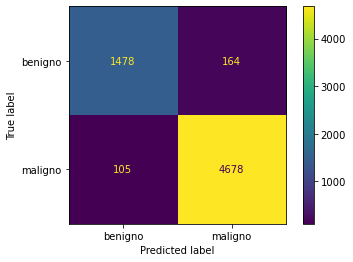

In [26]:
acuracia_media = model_selection.cross_val_score(clf, X, y, cv=5)
print("Acurácia média foi de: {:.2f}".format(acuracia_media.mean())) 

y_pred = model_selection.cross_val_predict(clf, X, y, cv=5)

#Precisão
precisao = precision_score(y, y_pred, average='macro')

#Revocação
revocacao = recall_score(y, y_pred, average='macro')

#F1-score
f1 = f1_score(y, y_pred, average='macro')

print("Precisão foi de {:.2f}".format(precisao))
print("Revocação foi de {:.2f}".format(revocacao))
print("F1: {:.2f}".format(f1))

matrix=ConfusionMatrixDisplay(y, y_pred)
cm = confusion_matrix(y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benigno', 'maligno'])
disp.plot()